#1D CNN KERAS


In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv1D
import numpy as np
from keras.optimizers import SGD,Adam
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

In [ ]:
data=np.random.random((100,8192,1))

In [ ]:
labels=np.random.random((100,44))
for j in range(labels.shape[0]):
  for i in range(labels.shape[1]):
    if labels[j][i]>0.5:
      labels[j][i]=1
    else :
      labels[j][i]= 0 

(array([ 9.,  4., 23.,  5., 19.,  9., 14.,  5., 11.,  1.]),
 array([15. , 16.5, 18. , 19.5, 21. , 22.5, 24. , 25.5, 27. , 28.5, 30. ]),
 <a list of 10 Patch objects>)

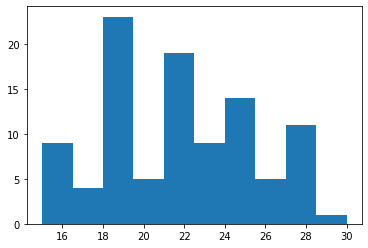

In [ ]:
graph=np.sum(labels,axis=1)
plt.hist(graph)

(array([ 1.,  3.,  6.,  8.,  8., 11.,  3.,  2.,  0.,  2.]),
 array([37. , 39.7, 42.4, 45.1, 47.8, 50.5, 53.2, 55.9, 58.6, 61.3, 64. ]),
 <a list of 10 Patch objects>)

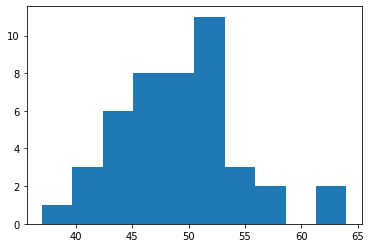

In [ ]:
graph=np.sum(labels,axis=0)
plt.hist(graph)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, random_state=1, test_size=0.2)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(80, 8192, 1) (80, 44) (20, 8192, 1) (20, 44)


In [ ]:
model = Sequential()
model.add(Conv1D(filters=4,   kernel_size=4, activation="relu", input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(Conv1D(filters=8,   kernel_size=4, activation="relu", input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(Conv1D(filters=16,  kernel_size=4, activation="relu",padding='valid',use_bias='True'))
model.add(Dropout(0.2))
model.add(Conv1D(filters=64,  kernel_size=4, activation="relu",padding='valid',use_bias='True'))
model.add(Dropout(0.2))
model.add(Conv1D(filters=32,  kernel_size=4, activation="relu",padding='valid',use_bias='True'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(44, activation='sigmoid'))

In [ ]:
sgd = SGD(lr=1e-3,decay=1e-6, momentum=0.99,nesterov=True, clipnorm=1.0)
#sgd = Adam(lr=1e-3,beta_1=0.9,beta_2=0.999,epsilon=1e-07,amsgrad=False)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
a=model.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test), batch_size=50)#,callbacks=[model_checkpoint])

Train on 80 samples, validate on 20 samples
Epoch 1/2
80/80 [==============================] - 2s 31ms/step - loss: 0.6921 - accuracy: 0.5273 - val_loss: 0.6930 - val_accuracy: 0.5125
Epoch 2/2
80/80 [==============================] - 2s 25ms/step - loss: 0.6898 - accuracy: 0.5395 - val_loss: 0.6929 - val_accuracy: 0.5216


In [ ]:
for j in range (3):
  model.save('/gdrive/My Drive/GW /model'+str(j)+'.h5')
  new_model = keras.models.load_model('/gdrive/My Drive/GW /model'+str(j)+'.h5')
  new_model.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test), batch_size=50)
  print('Training :',3*(j+2))

Train on 80 samples, validate on 20 samples
Epoch 1/2
80/80 [==============================] - 2s 30ms/step - loss: 0.6894 - accuracy: 0.5455 - val_loss: 0.6932 - val_accuracy: 0.5148
Epoch 2/2
80/80 [==============================] - 2s 24ms/step - loss: 0.6868 - accuracy: 0.5568 - val_loss: 0.6938 - val_accuracy: 0.5068
Training : 6
Train on 80 samples, validate on 20 samples
Epoch 1/2
80/80 [==============================] - 2s 31ms/step - loss: 0.6885 - accuracy: 0.5486 - val_loss: 0.6932 - val_accuracy: 0.5182
Epoch 2/2
80/80 [==============================] - 2s 25ms/step - loss: 0.6882 - accuracy: 0.5466 - val_loss: 0.6938 - val_accuracy: 0.5034
Training : 9
Train on 80 samples, validate on 20 samples
Epoch 1/2
80/80 [==============================] - 3s 32ms/step - loss: 0.6890 - accuracy: 0.5452 - val_loss: 0.6932 - val_accuracy: 0.5216
Epoch 2/2
80/80 [==============================] - 2s 28ms/step - loss: 0.6876 - accuracy: 0.5455 - val_loss: 0.6935 - val_accuracy: 0.5205
Tr

In [ ]:
a=new_model.fit(X_train, y_train, epochs=12, validation_data=(X_test, y_test), batch_size=50)

Train on 80 samples, validate on 20 samples
Epoch 1/12
80/80 [==============================] - 2s 30ms/step - loss: 0.6930 - accuracy: 0.5409 - val_loss: 0.6932 - val_accuracy: 0.4977
Epoch 2/12
80/80 [==============================] - 2s 25ms/step - loss: 0.6929 - accuracy: 0.5437 - val_loss: 0.6932 - val_accuracy: 0.5023
Epoch 3/12
80/80 [==============================] - 2s 25ms/step - loss: 0.6929 - accuracy: 0.5432 - val_loss: 0.6932 - val_accuracy: 0.5045
Epoch 4/12
80/80 [==============================] - 2s 25ms/step - loss: 0.6928 - accuracy: 0.5466 - val_loss: 0.6931 - val_accuracy: 0.5023
Epoch 5/12
80/80 [==============================] - 2s 25ms/step - loss: 0.6928 - accuracy: 0.5477 - val_loss: 0.6931 - val_accuracy: 0.5023
Epoch 6/12
80/80 [==============================] - 2s 25ms/step - loss: 0.6927 - accuracy: 0.5477 - val_loss: 0.6931 - val_accuracy: 0.5023
Epoch 7/12
80/80 [==============================] - 2s 25ms/step - loss: 0.6926 - accuracy: 0.5477 - val_loss:

#2D CNN KERAS


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import AveragePooling2D, Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
from keras.optimizers import SGD
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

Using TensorFlow backend.


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Mounted at /content/gdrive


In [ ]:
import pandas as pd
labels = pd.read_csv('gdrive/My Drive/GW data/labels_5.csv')
labels = np.array(labels)
print(labels.shape)

(21540, 27)


In [ ]:
train = labels[:3124,:]

In [ ]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('gdrive/My Drive/GW data/Image/'+str(i)+'.png',target_size=(50,50,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 3124/3124 [00:11<00:00, 279.26it/s]


In [ ]:
#data=np.random.random((500,128,128,3))
#plt.imshow(data[0])#[:5,:5])

In [ ]:
#labels=np.random.random((500,27))
#for j in range(labels.shape[0]):
#  for i in range(labels.shape[1]):
#    if labels[j][i]>0.5:
#      labels[j][i]=1
#    else :
#      labels[j][i]= 0 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, train, random_state=1, test_size=0.2)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(2499, 50, 50, 3) (2499, 27) (625, 50, 50, 3) (625, 27)


In [ ]:
model = Sequential()
model.add(Conv2D(filters=4,  kernel_size=(2,2), activation="relu", input_shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3])))
model.add(Dropout(0.2))
model.add(Conv2D(filters=8,  kernel_size=(2,2), activation="relu", input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=16, kernel_size=(2,2), activation="relu",padding='valid',use_bias='True'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32, kernel_size=(2,2), activation='relu',padding='valid',use_bias='True'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64, kernel_size=(2,2), activation="relu",padding='valid',use_bias='True'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128, kernel_size=(2,2), activation="relu",padding='valid',use_bias='True'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=256, kernel_size=(2,2), activation="relu",padding='valid',use_bias='True'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=512, kernel_size=(2,2), activation="relu",padding='valid',use_bias='True'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=1024, kernel_size=(2,2), activation="relu",padding='valid',use_bias='True'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=512, kernel_size=(2,2), activation="relu",padding='valid',use_bias='True'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=256, kernel_size=(2,2), activation="relu",padding='valid',use_bias='True'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128, kernel_size=(2,2), activation="relu",padding='valid',use_bias='True'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=(2,2), activation="relu",padding='valid',use_bias='True'))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32, kernel_size=(2,2), activation="relu",padding='valid',use_bias='True'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(27, activation='sigmoid'))

In [ ]:
sgd = SGD(lr=1e-3,decay=1e-6, momentum=0.99,nesterov=True, clipnorm=1.0)
model.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])
a=model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), batch_size=100)#,callbacks=[model_checkpoint])

2499/2499 [==============================] - 23s 9ms/step - loss: 0.2818 - accuracy: 0.8775 - val_loss: 0.2702 - val_accuracy: 0.8808
Epoch 24/50
 200/2499 [=>............................] - ETA: 19s - loss: 0.2808 - accuracy: 0.8793

In [ ]:
while`

#IDLE 2 without spin

In [ ]:
pip install gwpy lalsuite Pycbc

     |████████████████████████████████| 1.4MB 7.8MB/s 
     |████████████████████████████████| 27.2MB 147kB/s 
     |████████████████████████████████| 3.2MB 46.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 51kB 6.8MB/s 
     |████████████████████████████████| 1.6MB 40.4MB/s 
     |████████████████████████████████| 81kB 10.9MB/s 
     |████████████████████████████████| 1.0MB 56.5MB/s 
     |████████████████████████████████| 61kB 8.2MB/s 
     |████████████████████████████████| 2.7MB 59.4MB/s 
  Created wheel for Pycbc: filename=PyCBC-1.16.4-cp36-cp36m-linux_x86_64.whl size=5676445 sha256=f8630cc800e9da47e2b2766ac2c02aafb313ea137073ab657322b02c47fc1ee0
  Stored in directory: /root/.cache/pip/wheels/d9/3b/bd/553cae717a56a577c8c0efe20ca2b09163f8fbdb5db3941bcf
Successfully built Pycbc
  Created wheel for ligo-segments: filename=ligo_segments-1.2.0-cp36-cp36m-linux_x

In [ ]:
import numpy as np
from pycbc.waveform import get_td_waveform
from gwpy.timeseries import TimeSeries
from tqdm import tqdm
#---Data reading and writing---------------
import csv
import h5py
import pandas as pd
from scipy import signal
import scipy.io.wavfile as s
import matplotlib.pyplot as plt

In [ ]:
a=(['5','10','15','5','10','15','50','150','250','350','450','60','120','50']) #SIMULATED SIGNALS+TRANSIENT NOISE
b=(['UIE','CIE','250','280']) #ECHOES +TRANSIENT NOISE
c=(['Glitch'])
d=(['I','II','III','10','30','30','60']) ## CCSNe+TRANSIENT NOISE
e=(['Noise'])
print(len(a),len(b),len(c),len(d),len(e),len(a+b+c+d+e))
print(a+b+c+d+e)

14 4 1 7 1 27
['5', '10', '15', '5', '10', '15', '50', '150', '250', '350', '450', '60', '120', '50', 'UIE', 'CIE', '250', '280', 'Glitch', 'I', 'II', 'III', '10', '30', '30', '60', 'Noise']


In [ ]:
next_val=0
#------------------------------------------------------------------
#                    TRAINING DATASETS PREPRATION               ---
#------------------------------------------------------------------

class dataprep_train:

#------------------------------------------------------------------
#                    SIMULATED SIGNALS+TRANSIENT NOISE
#------------------------------------------------------------------
  def simulated_signals(noise):  
    global next_val,signal_gw
    apx=['TaylorT1','TaylorT2','EOBNRv2','SEOBNRv1','SEOBNRv2']
    with open('gdrive/My Drive/GW data/labels_5_noise.csv', 'a', newline='') as file:
      for a in tqdm(range(len(apx))):
        check=np.zeros(noise.shape[1])
        k=0
        for m1 in range(5,16,5):
          for m2 in range(5,16,5):
            for d in range(50,501,100):
              for fl in [60,120]:
                if (m1+m2+d+fl) not in check:
                  check[k]=m1+m2+d+fl
                  hp,hc = get_td_waveform(approximant=apx[a],
                                    mass1=m1,mass2=m2,
                                    delta_t=1.0/4096,
                                    f_lower=fl,f_final=50, 
                                    distance=d)
                    
                  if len(hp)<=noise.shape[1]:
                    signal_gw[next_val:next_val+noise.shape[0],:]=np.copy(noise)
                    pos=np.random.randint(0,noise.shape[1]-len(hp))
                    signal_gw[next_val:next_val+noise.shape[0],pos:pos+len(hp)]+=hp
                    writer = csv.writer(file)
                    for i in range(noise.shape[0]):
                      col=np.zeros(27)
                      col[m1//5-1],col[2+m2//4],col[5+d//50],col[10+fl//60],col[13],col[26]=1,1,1,1,1,1
                      writer.writerow(col)
                    k=k+1
                    next_val+=(noise.shape[0])
                    
#------------------------------------------------------------------
#                    ECHOES +TRANSIENT NOISE
#------------------------------------------------------------------
  def echoes(noise):
    global next_val,signal_gw
    signal_gw[next_val:next_val+noise.shape[0],:]=np.copy(noise)
    with open('gdrive/My Drive/GW data/labels_5_noise.csv', 'a', newline='') as file:
      for loop in tqdm(range(10)):
        t=np.linspace(0,.3,np.random.randint(noise.shape[1]))
        y1,y2=np.zeros(len(t)),np.zeros(len(t))
        i=0
        for j in range(8):
          for f in [250,280]:
            for i in range(len(t)):
              aa=t[i]-0.0295-j*0.0295
              y1[i]+=1.5*10e-21*(-1)**j*(1.5*10e-21*.5/(3+j))*np.exp(-(aa**2)/(2*.006**2))*np.cos(2*np.pi*f*aa)
            pos=np.random.randint(0,noise.shape[1]-len(t))
            signal_gw[next_val:next_val+noise.shape[0]-1,pos:pos+len(t)]+=y1
            next_val+=(noise.shape[0])
            writer = csv.writer(file)
            for i in range(noise.shape[0]):
              col=np.zeros(27)
              if f == 250:
                col[16]=1
              else:
                col[17]=1
              col[14],col[26]=1,1
              writer.writerow(col)

        r=.3
        for j in range(8):
          for f in [250,280]:
            for i in range(len(t)):
              aa=t[i]-0.0295-j*0.0295-(j*(j+1)/2)*r*0.0295
              y2[i]+=1.5*10e-21*(-1)**j*(1.5*10e-21*.5/(3+j))*np.exp(-(aa**2)/(2*.006**2))*np.cos(2*np.pi*f*aa)
            pos=np.random.randint(0,noise.shape[1]-len(t))
            signal_gw[next_val:next_val+noise.shape[0]-1,pos:pos+len(t)]+=y2
            next_val+=(noise.shape[0])
            writer = csv.writer(file)          
            for i in range(noise.shape[0]):
              col=np.zeros(27)
              if f == 250:
                col[16]=1
              else:
                col[17]=1
              col[15],col[26]=1,1
              writer.writerow(col)


#------------------------------------------------------------------
#                    GLITCHES+TRANSIENT NOISE
#------------------------------------------------------------------
  def glitches(noise):
    global next_val,signal_gw
    signal_gw[next_val:next_val+noise.shape[0],:]=np.copy(noise)
    with open('gdrive/My Drive/GW data/labels_5_noise.csv', 'a', newline='') as file:
      for i in tqdm(['helix2','whistle','wandering_line','violin_mode','Tomte','koi_fish','scratchy','scattered_light','repeating_blip','power_line','paired_dove','low_freq_burst','light_modulation']):
        loc='gdrive/My Drive/GW data/Glitches/'+i+'.wav'
        rate,data=s.read(loc)
        for c1 in range(5,9):
          for c2 in range(3,13,2):
            b, a = signal.butter(c1, .9, btype='lowpass', analog=False)
            low_passed = signal.filtfilt(b, a, data)
            y = 10e-28*signal.medfilt(low_passed,c2)
            pos=np.random.randint(0,noise.shape[1]-len(y))
            signal_gw[next_val:next_val+noise.shape[0],pos:pos+len(y)]+=y
            next_val+=(noise.shape[0])
            writer = csv.writer(file)
            for i in range(noise.shape[0]):
              col=np.zeros(27)
              col[18],col[26]=1,1
              writer.writerow(col)

#------------------------------------------------------------------------------
#                             CCSNe+Transient Noise               -------------
#------------------------------------------------------------------------------
  def ccsne(noise):
    global next_val,signal_gw
    signal_gw[next_val:next_val+noise.shape[0]]=np.copy(noise)
    with open('gdrive/My Drive/GW data/labels_5_noise.csv', 'a', newline='') as file:
      val=['signal_A1B1G1_R.dat','signal_A1B2G1_R.dat','signal_A1B3G1_R.dat','signal_A1B3G2_R.dat','signal_A1B3G3_R.dat','signal_A1B3G5_R.dat','signal_A2B4G1_R.dat','signal_A3B1G1_R.dat','signal_A3B2G1_R.dat','signal_A3B2G2_R.dat','signal_A3B2G4_soft_R.dat','signal_A3B2G4_R.dat','signal_A3B3G1_R.dat','signal_A3B3G2_R.dat','signal_A3B3G3_R.dat','signal_A3B3G5_R.dat','signal_A3B4G2_R.dat','signal_A3B5G4_R.dat','signal_A4B1G1_R.dat','signal_A4B1G2_R.dat','signal_A4B2G2_R.dat','signal_A4B2G3_R.dat','signal_A4B4G4_R.dat','signal_A4B4G5_R.dat','signal_A4B5G4_R.dat','signal_A4B5G5_R.dat']
      for aak in tqdm(val):
        loc='gdrive/My Drive/GW data/CCSNe/'+aak
        x, y = np.loadtxt(loc,unpack=True, usecols=[0,1])
        for r in [10,30]:
          for theta in [30,60]:
            y = 1/8*np.sqrt(15/np.pi)*y/r*(np.sin(theta))**2
            new_arr=np.zeros(noise.shape[1]-500)
            j=0
            for i in range(0,len(y),2):
              new_arr[j]=y[i]
              j+=1            
            pos=np.random.randint(0,noise.shape[1]-len(new_arr))
            signal_gw[next_val:next_val+noise.shape[0],pos:pos+len(new_arr)]+=new_arr
            writer = csv.writer(file)
            for i in range(noise.shape[0]):
              col=np.zeros(27)
              if val=='signal_A2B4G1_R.dat'  or   val=='signal_A3B3G5_R.dat' or  val=='signal_A3B5G4_R.dat' :
                col[19]=1
              elif val=='signal_A3B3G1_R.dat'  or val=='signal_A3B4G2_R.dat':
                col[20]=1
              elif val=='signal_A3B3G2_R.dat' or  val=='signal_A3B3G3_R.dat' or  val=='signal_A4B2G2_R.dat' or  val=='signal_A4B2G3_R.dat' or  val=='signal_A4B4G4_R.dat' or  val=='signal_A4B4G5_R.dat' or  val=='signal_A4B5G4_R.dat' or  val=='signal_A4B5G5_R.dat':
                col[20],col[21]=1,1
              else:
                col[21]=1
              if r==10:
                col[22]=1
              else:
                col[23]=1
              col[23+theta//30],col[26]=1,1
              writer.writerow(col)
            next_val=next_val+noise.shape[0]    

#------------------------------------------------------------------------------
#                             MIXED SIGNALS                       -------------
#------------------------------------------------------------------------------
  def mixed_signals_BHBNSB(noise):
    global next_val,signal_gw
    #apx=
    with open('gdrive/My Drive/GW data/labels_5_noise.csv', 'a', newline='') as file:
      for aab in ['TaylorT1','TaylorT2','EOBNRv2','SEOBNRv1','SEOBNRv2']:
        print(aab)
        check=np.zeros(noise.shape[1])
        k=0
        for m1 in tqdm(range(5,16,5)):
          for m2 in range(5,16,5):
            for d in (range(50,501,100)):
              for fl in [60,120]:
                if (m1+m2+d+fl) not in check:
                  check[k]=m1+m2+d+fl
                  hp,hc = get_td_waveform(approximant=aab,
                                    mass1=m1,mass2=m2,
                                    delta_t=1.0/4096,
                                    f_lower=fl,f_final=50, 
                                    distance=d)
                  
                  if len(hp)<=noise.shape[1]:
                    t=np.linspace(0,.3,np.random.randint(noise.shape[1]))
                    y2=np.zeros(len(t))          
                    r=.3
                    for j in range(3,8):
                      for i in range(len(t)):
                        aa=t[i]-0.0295-j*0.0295-(j*(j+1)/2)*r*0.0295
                        y2[i]+=1.5*10e-21*(-1)**j*(1.5*10e-21*.5/(3+j))*np.exp(-(aa**2)/(2*.006**2))*np.cos(2*np.pi*250*aa)

                      wave=['helix2','whistle','wandering_line','violin_mode','Tomte','koi_fish','scratchy','scattered_light','repeating_blip','power_line','paired_dove','low_freq_burst','light_modulation']
                      for wave_name in wave: 
                        loc='gdrive/My Drive/GW data/Glitches/'+wave_name+'.wav'
                        rate,data=s.read(loc)
                        for c2 in [5]:
                          b, a = signal.butter(7, .9, btype='lowpass', analog=False)
                          low_passed = signal.filtfilt(b, a, data)
                          z = 10e-28*signal.medfilt(low_passed,c2)
                          signal_gw[next_val:next_val+noise.shape[0]]=np.copy(noise)
                          pos=np.random.randint(0,noise.shape[1]-len(hp))
                          signal_gw[next_val:next_val+noise.shape[0] ,pos:pos+len(hp)]+=hp
                          pos=np.random.randint(0,noise.shape[1]-len(z))
                          signal_gw[next_val:next_val+noise.shape[0] ,pos:pos+len(z)]+=z
                          pos=np.random.randint(0,noise.shape[1]-len(y2))                                  
                          signal_gw[next_val:next_val+noise.shape[0] ,pos:pos+len(y2)]+=y2
                          writer = csv.writer(file)
                          for i in range(noise.shape[0]):
                            col=np.zeros(27)
                            col[m1//5-1],col[2+m2//4],col[5+d//50],col[10+fl//60],col[13],col[18],col[26]=1,1,1,1,1,1,1
                            writer.writerow(col)  
                          k=k+1
                          next_val+=(noise.shape[0])

#------------------------------------------------------------------------------
#                             MIXED SIGNALS                       -------------
#------------------------------------------------------------------------------
  def mixed_signals_CCSNe(noise):
    global next_val,signal_gw  
    with open('gdrive/My Drive/GW data/labels_5_noise.csv', 'a', newline='') as file:
      val=['signal_A1B1G1_R.dat','signal_A1B2G1_R.dat','signal_A1B3G1_R.dat','signal_A1B3G2_R.dat','signal_A1B3G3_R.dat','signal_A1B3G5_R.dat','signal_A2B4G1_R.dat','signal_A3B1G1_R.dat','signal_A3B2G1_R.dat','signal_A3B2G2_R.dat','signal_A3B2G4_soft_R.dat','signal_A3B2G4_R.dat','signal_A3B3G1_R.dat','signal_A3B3G2_R.dat','signal_A3B3G3_R.dat','signal_A3B3G5_R.dat','signal_A3B4G2_R.dat','signal_A3B5G4_R.dat','signal_A4B1G1_R.dat','signal_A4B1G2_R.dat','signal_A4B2G2_R.dat','signal_A4B2G3_R.dat','signal_A4B4G4_R.dat','signal_A4B4G5_R.dat','signal_A4B5G4_R.dat','signal_A4B5G5_R.dat']
      for aak in tqdm(val):
        loc='gdrive/My Drive/GW data/CCSNe/'+aak
        x, y = np.loadtxt(loc,unpack=True, usecols=[0,1])
        for r in [10,30]:
          for theta in [30,60]:
            y = 1/8*np.sqrt(15/np.pi)*y/r*(np.sin(theta))**2
            new_arr=np.zeros(noise.shape[1]-500)
            j=0
            for i in range(0,len(y),2):
              new_arr[j]=y[i]
              j+=1               
            wave=['helix2','whistle','wandering_line','violin_mode','Tomte','koi_fish','scratchy','scattered_light','repeating_blip','power_line','paired_dove','low_freq_burst','light_modulation']
            for wave_name in wave: 
              loc='gdrive/My Drive/GW data/Glitches/'+wave_name+'.wav'
              rate,data=s.read(loc)
              for c2 in [5]:
                b, a = signal.butter(7, .9, btype='lowpass', analog=False)
                low_passed = signal.filtfilt(b, a, data)
                z = 10e-28*signal.medfilt(low_passed,c2)
                signal_gw[next_val:next_val+noise.shape[0]]=np.copy(noise)
                pos=np.random.randint(0,noise.shape[1]-len(z)) 
                signal_gw[next_val:next_val+noise.shape[0],pos:pos+len(z)]+=z 
                pos=np.random.randint(0,noise.shape[1]-len(new_arr))
                signal_gw[next_val:next_val+noise.shape[0],pos:pos+len(new_arr)]+=new_arr   
                writer = csv.writer(file)
                for i in range(noise.shape[0]):
                  col=np.zeros(27)
                  if val=='signal_A2B4G1_R.dat'  or   val=='signal_A3B3G5_R.dat' or  val=='signal_A3B5G4_R.dat' :
                    col[19]=1
                  elif val=='signal_A3B3G1_R.dat'  or val=='signal_A3B4G2_R.dat':
                    col[20]=1
                  elif val=='signal_A3B3G2_R.dat' or  val=='signal_A3B3G3_R.dat' or  val=='signal_A4B2G2_R.dat' or  val=='signal_A4B2G3_R.dat' or  val=='signal_A4B4G4_R.dat' or  val=='signal_A4B4G5_R.dat' or  val=='signal_A4B5G4_R.dat' or  val=='signal_A4B5G5_R.dat':
                    col[20],col[21]=1,1
                  else:
                    col[21]=1
                  if r==10:
                    col[22]=1
                  else:
                    col[23]=1
                  col[18],col[23+theta//30],col[26]=1,1,1
                  writer.writerow(col)
                next_val+=noise.shape[0]



#----------------------------------------------------------------------------------
#                               PIPELINES                                       ---
#----------------------------------------------------------------------------------
def train_pipeline(noise):
  global next_val,signal_gw
  val=dataprep_train
  with open('gdrive/My Drive/GW data/labels_5_noise.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['5', '10', '15', '5', '10', '15', '50', '150', '250', '350', '450', '60', '120', '50', 'UIE', 'CIE', '250', '280', 'Glitch', 'I', 'II', 'III', '10', '30', '30', '60', 'Noise'])
  print('\nSimulated GW .......')    
  val.simulated_signals(noise)
  print('\nSimulated GW training set 100%')
  print('data size :'+ str(next_val)+'\n')  
  print('\nEchoes...')
  val.echoes(noise)
  print('data size :'+ str(next_val)+'\n')
  print('\nEchoes 100%')
  print('\nCCSNE...')  
  val.ccsne(noise)
  print('data size :'+ str(next_val)+'\n')
  print('\nCCSNE 100%')
  print('\nGlitches...')    
  val.glitches(noise)
  print('data size :'+ str(next_val)+'\n')  
  print('\nGlitches 100%')  
  print('\nMixed training BHBNSB ...' )
  val.mixed_signals_BHBNSB(noise)
  print('\nMixed set BHBNSB 100%')
  print('data size :'+ str(next_val)+'\n')
  print('\nMixed training CCSNe...' )
  val.mixed_signals_CCSNe(noise)
  print('\nMixed set CCSNe 100%')
  print('data size :'+ str(next_val)+'\n')
  #hf = h5py.File('gdrive/My Drive/GW data/mixed_5.h5', 'w')
  #hf.create_dataset('mixed_5', data=signal_gw)
  #hf.close()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
ls gdrive/My\ Drive/GW\ data/

 1164685312_4096.hdf5  'Glitch images'/   labels_5_noise.csv   noise.h5
 CCSNe/                 Image_n/          labels_mixed.csv
 Glitches/              Image_v/          mixed.h5


In [ ]:
#--------------------------------------------------------
#---------------------------MAIN-------------------------
#--------------------------------------------------------
#if __name__ == '__main__':
  #global next_val
#  #print('\nCollecting noise.....\n data size : '+str(next_val))
#hf= h5py.File('gdrive/My Drive/GW data/noise.h5', 'r')
#group_key = list(hf.keys())[0]
#noise= hf[group_key]
#noise=np.array(noise)
#print(noise.shape,type(noise))
#hf.close()
#noise=noise[:5]
#print(noise.shape)

In [ ]:
hf= h5py.File('gdrive/My Drive/GW data/1164685312_4096.hdf5', 'r')
group_key = list(hf.keys())
strain=hf['strain']['Strain'].value
ts = hf['strain']['Strain'].attrs['Xspacing']
metaKeys = hf['meta'].keys()
meta = hf['meta']
gpsStart = meta['GPSstart'].value
duration = meta['Duration'].value
gpsEnd   = gpsStart + duration
time = np.arange(gpsStart, gpsEnd, ts)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  


In [ ]:
noise=np.zeros((2,49152))
for i in range(noise.shape[0]):
  numSamples = 4096*12*i
  next_numSamples = 4096*12*(i+1)
  print(numSamples, next_numSamples)
  noise[i] = strain[numSamples:next_numSamples]
print('noise : ',noise.shape)

0 49152
49152 98304
noise :  (2, 49152)


In [ ]:
signal_gw=np.zeros((37072,noise.shape[1]))
next_val=0

In [ ]:
print('\n\nPreparing data..... ')
train_pipeline(noise) #--------training-------------#
print('\nPreparing data........100%\n\n')



Preparing data..... 


 20%|██        | 1/5 [00:00<00:00,  9.61it/s]


Simulated GW .......


  0%|          | 0/10 [00:00<?, ?it/s]


Simulated GW training set 100%
data size :500


Echoes...


  0%|          | 0/26 [00:00<?, ?it/s]

data size :1140


Echoes 100%

CCSNE...


  0%|          | 0/13 [00:00<?, ?it/s]

data size :1348


CCSNE 100%

Glitches...


  0%|          | 0/3 [00:00<?, ?it/s]

data size :1868


Glitches 100%

Mixed training BHBNSB ...
TaylorT1


  0%|          | 0/3 [00:00<?, ?it/s]

TaylorT2


  0%|          | 0/3 [00:00<?, ?it/s]

EOBNRv2


  0%|          | 0/3 [00:00<?, ?it/s]

SEOBNRv1


  0%|          | 0/3 [00:00<?, ?it/s]

SEOBNRv2


  0%|          | 0/26 [00:00<?, ?it/s]


Mixed set BHBNSB 100%
data size :34368


Mixed training CCSNe...


100%|██████████| 26/26 [00:28<00:00,  1.08s/it]


Mixed set CCSNe 100%
data size :37072


Preparing data........100%




In [ ]:
k=signal_gw[:next_val,:]
print(k.shape)
for e in range(k.shape[0]):
  k[e]=(k[e]-np.mean(k[e] ,axis=0))/np.std(k[e])

(37072, 49152)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [ ]:
alb=k.reshape((k.shape[0],128,128,3))
print(alb.shape)

(37072, 128, 128, 3)


36600
36700
36800
36900
37000


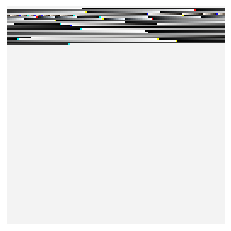

In [ ]:
for i in (range(alb.shape[0])):
  plt.axis("off")
  plt.imshow((alb[i]* 255).astype(np.uint8), cmap=None, interpolation='nearest')
  plt.savefig('gdrive/My Drive/GW data/Image_n/'+str(i+37073)+'.png')
  if i%100==0:
    print(i+37073)

In [ ]:
while

SyntaxError: ignored

#IDLE 2 without spin noise = 0 

In [1]:
pip install gwpy lalsuite Pycbc

     |████████████████████████████████| 1.4MB 7.8MB/s 
     |████████████████████████████████| 27.2MB 146kB/s 
     |████████████████████████████████| 3.2MB 60.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 51kB 6.8MB/s 
     |████████████████████████████████| 1.6MB 53.8MB/s 
     |████████████████████████████████| 1.0MB 44.0MB/s 
     |████████████████████████████████| 81kB 9.5MB/s 
     |████████████████████████████████| 61kB 7.9MB/s 
     |████████████████████████████████| 2.7MB 48.3MB/s 
  Created wheel for Pycbc: filename=PyCBC-1.16.4-cp36-cp36m-linux_x86_64.whl size=5676472 sha256=ba1e448984ea0488f2a7613863caba30d86c2782405004e0bd52031261096fa6
  Stored in directory: /root/.cache/pip/wheels/d9/3b/bd/553cae717a56a577c8c0efe20ca2b09163f8fbdb5db3941bcf
Successfully built Pycbc
  Created wheel for ligo-segments: filename=ligo_segments-1.2.0-cp36-cp36m-linux_x8

In [2]:
import numpy as np
from pycbc.waveform import get_td_waveform
from gwpy.timeseries import TimeSeries
from tqdm import tqdm
#---Data reading and writing---------------
import csv
import h5py
import pandas as pd
from scipy import signal
import scipy.io.wavfile as s
import matplotlib.pyplot as plt

In [3]:
a=(['5','10','15','5','10','15','50','150','250','350','450','60','120','50']) #SIMULATED SIGNALS+TRANSIENT NOISE
b=(['UIE','CIE','250','280']) #ECHOES +TRANSIENT NOISE
c=(['Glitch'])
d=(['I','II','III','10','30','30','60']) ## CCSNe+TRANSIENT NOISE
e=(['Noise'])
print(len(a),len(b),len(c),len(d),len(e),len(a+b+c+d+e))
print(a+b+c+d+e)

14 4 1 7 1 27
['5', '10', '15', '5', '10', '15', '50', '150', '250', '350', '450', '60', '120', '50', 'UIE', 'CIE', '250', '280', 'Glitch', 'I', 'II', 'III', '10', '30', '30', '60', 'Noise']


In [4]:
next_val=0
#------------------------------------------------------------------
#                    TRAINING DATASETS PREPRATION               ---
#------------------------------------------------------------------

class dataprep_train:

#------------------------------------------------------------------
#                    SIMULATED SIGNALS+TRANSIENT NOISE
#------------------------------------------------------------------
  def simulated_signals(noise):  
    global next_val,signal_gw
    apx=['TaylorT1','TaylorT2','EOBNRv2','SEOBNRv1','SEOBNRv2']
    with open('gdrive/My Drive/GW data/labels_5_nonoise.csv', 'a', newline='') as file:
      for a in tqdm(range(len(apx))):
        check=np.zeros(noise.shape[1])
        k=0
        for m1 in range(5,16,5):
          for m2 in range(5,16,5):
            for d in range(50,501,100):
              for fl in [60,120]:
                if (m1+m2+d+fl) not in check:
                  check[k]=m1+m2+d+fl
                  hp,hc = get_td_waveform(approximant=apx[a],
                                    mass1=m1,mass2=m2,
                                    delta_t=1.0/4096,
                                    f_lower=fl,f_final=50, 
                                    distance=d)
                    
                  if len(hp)<=noise.shape[1]:
                    signal_gw[next_val:next_val+noise.shape[0],:]=np.copy(noise)
                    pos=np.random.randint(0,noise.shape[1]-len(hp))
                    signal_gw[next_val:next_val+noise.shape[0],pos:pos+len(hp)]+=hp
                    writer = csv.writer(file)
                    for i in range(noise.shape[0]):
                      col=np.zeros(27)
                      col[m1//5-1],col[2+m2//4],col[5+d//50],col[10+fl//60],col[13],col[26]=1,1,1,1,1,0
                      writer.writerow(col)
                    k=k+1
                    next_val+=(noise.shape[0])
                    
#------------------------------------------------------------------
#                    ECHOES +TRANSIENT NOISE
#------------------------------------------------------------------
  def echoes(noise):
    global next_val,signal_gw
    signal_gw[next_val:next_val+noise.shape[0],:]=np.copy(noise)
    with open('gdrive/My Drive/GW data/labels_5_nonoise.csv', 'a', newline='') as file:
      for loop in tqdm(range(10)):
        t=np.linspace(0,.3,np.random.randint(noise.shape[1]))
        y1,y2=np.zeros(len(t)),np.zeros(len(t))
        i=0
        for j in range(8):
          for f in [250,280]:
            for i in range(len(t)):
              aa=t[i]-0.0295-j*0.0295
              y1[i]+=1.5*10e-21*(-1)**j*(1.5*10e-21*.5/(3+j))*np.exp(-(aa**2)/(2*.006**2))*np.cos(2*np.pi*f*aa)
            pos=np.random.randint(0,noise.shape[1]-len(t))
            signal_gw[next_val:next_val+noise.shape[0]-1,pos:pos+len(t)]+=y1
            next_val+=(noise.shape[0])
            writer = csv.writer(file)
            for i in range(noise.shape[0]):
              col=np.zeros(27)
              if f == 250:
                col[16]=1
              else:
                col[17]=1
              col[14],col[26]=1,0
              writer.writerow(col)

        r=.3
        for j in range(8):
          for f in [250,280]:
            for i in range(len(t)):
              aa=t[i]-0.0295-j*0.0295-(j*(j+1)/2)*r*0.0295
              y2[i]+=1.5*10e-21*(-1)**j*(1.5*10e-21*.5/(3+j))*np.exp(-(aa**2)/(2*.006**2))*np.cos(2*np.pi*f*aa)
            pos=np.random.randint(0,noise.shape[1]-len(t))
            signal_gw[next_val:next_val+noise.shape[0]-1,pos:pos+len(t)]+=y2
            next_val+=(noise.shape[0])
            writer = csv.writer(file)          
            for i in range(noise.shape[0]):
              col=np.zeros(27)
              if f == 250:
                col[16]=1
              else:
                col[17]=1
              col[15],col[26]=1,0
              writer.writerow(col)


#------------------------------------------------------------------
#                    GLITCHES+TRANSIENT NOISE
#------------------------------------------------------------------
  def glitches(noise):
    global next_val,signal_gw
    signal_gw[next_val:next_val+noise.shape[0],:]=np.copy(noise)
    with open('gdrive/My Drive/GW data/labels_5_nonoise.csv', 'a', newline='') as file:
      for i in tqdm(['helix2','whistle','wandering_line','violin_mode','Tomte','koi_fish','scratchy','scattered_light','repeating_blip','power_line','paired_dove','low_freq_burst','light_modulation']):
        loc='gdrive/My Drive/GW data/Glitches/'+i+'.wav'
        rate,data=s.read(loc)
        for c1 in range(5,9):
          for c2 in range(3,13,2):
            b, a = signal.butter(c1, .9, btype='lowpass', analog=False)
            low_passed = signal.filtfilt(b, a, data)
            y = 10e-28*signal.medfilt(low_passed,c2)
            pos=np.random.randint(0,noise.shape[1]-len(y))
            signal_gw[next_val:next_val+noise.shape[0],pos:pos+len(y)]+=y
            next_val+=(noise.shape[0])
            writer = csv.writer(file)
            for i in range(noise.shape[0]):
              col=np.zeros(27)
              col[18],col[26]=1,0
              writer.writerow(col)

#------------------------------------------------------------------------------
#                             CCSNe+Transient Noise               -------------
#------------------------------------------------------------------------------
  def ccsne(noise):
    global next_val,signal_gw
    signal_gw[next_val:next_val+noise.shape[0]]=np.copy(noise)
    with open('gdrive/My Drive/GW data/labels_5_nonoise.csv', 'a', newline='') as file:
      val=['signal_A1B1G1_R.dat','signal_A1B2G1_R.dat','signal_A1B3G1_R.dat','signal_A1B3G2_R.dat','signal_A1B3G3_R.dat','signal_A1B3G5_R.dat','signal_A2B4G1_R.dat','signal_A3B1G1_R.dat','signal_A3B2G1_R.dat','signal_A3B2G2_R.dat','signal_A3B2G4_soft_R.dat','signal_A3B2G4_R.dat','signal_A3B3G1_R.dat','signal_A3B3G2_R.dat','signal_A3B3G3_R.dat','signal_A3B3G5_R.dat','signal_A3B4G2_R.dat','signal_A3B5G4_R.dat','signal_A4B1G1_R.dat','signal_A4B1G2_R.dat','signal_A4B2G2_R.dat','signal_A4B2G3_R.dat','signal_A4B4G4_R.dat','signal_A4B4G5_R.dat','signal_A4B5G4_R.dat','signal_A4B5G5_R.dat']
      for aak in tqdm(val):
        loc='gdrive/My Drive/GW data/CCSNe/'+aak
        x, y = np.loadtxt(loc,unpack=True, usecols=[0,1])
        for r in [10,30]:
          for theta in [30,60]:
            y = 1/8*np.sqrt(15/np.pi)*y/r*(np.sin(theta))**2
            new_arr=np.zeros(noise.shape[1]-500)
            j=0
            for i in range(0,len(y),2):
              new_arr[j]=y[i]
              j+=1            
            pos=np.random.randint(0,noise.shape[1]-len(new_arr))
            signal_gw[next_val:next_val+noise.shape[0],pos:pos+len(new_arr)]+=new_arr
            writer = csv.writer(file)
            for i in range(noise.shape[0]):
              col=np.zeros(27)
              if val=='signal_A2B4G1_R.dat'  or   val=='signal_A3B3G5_R.dat' or  val=='signal_A3B5G4_R.dat' :
                col[19]=1
              elif val=='signal_A3B3G1_R.dat'  or val=='signal_A3B4G2_R.dat':
                col[20]=1
              elif val=='signal_A3B3G2_R.dat' or  val=='signal_A3B3G3_R.dat' or  val=='signal_A4B2G2_R.dat' or  val=='signal_A4B2G3_R.dat' or  val=='signal_A4B4G4_R.dat' or  val=='signal_A4B4G5_R.dat' or  val=='signal_A4B5G4_R.dat' or  val=='signal_A4B5G5_R.dat':
                col[20],col[21]=1,1
              else:
                col[21]=1
              if r==10:
                col[22]=1
              else:
                col[23]=1
              col[23+theta//30],col[26]=1,0
              writer.writerow(col)
            next_val=next_val+noise.shape[0]    

#------------------------------------------------------------------------------
#                             MIXED SIGNALS                       -------------
#------------------------------------------------------------------------------
  def mixed_signals_BHBNSB(noise):
    global next_val,signal_gw
    #apx=
    with open('gdrive/My Drive/GW data/labels_5_nonoise.csv', 'a', newline='') as file:
      for aab in ['TaylorT1','TaylorT2','EOBNRv2','SEOBNRv1','SEOBNRv2']:
        print(aab)
        check=np.zeros(noise.shape[1])
        k=0
        for m1 in tqdm(range(5,16,5)):
          for m2 in range(5,16,5):
            for d in (range(50,501,100)):
              for fl in [60,120]:
                if (m1+m2+d+fl) not in check:
                  check[k]=m1+m2+d+fl
                  hp,hc = get_td_waveform(approximant=aab,
                                    mass1=m1,mass2=m2,
                                    delta_t=1.0/4096,
                                    f_lower=fl,f_final=50, 
                                    distance=d)
                  
                  if len(hp)<=noise.shape[1]:
                    t=np.linspace(0,.3,np.random.randint(noise.shape[1]))
                    y2=np.zeros(len(t))          
                    r=.3
                    for j in range(3,8):
                      for i in range(len(t)):
                        aa=t[i]-0.0295-j*0.0295-(j*(j+1)/2)*r*0.0295
                        y2[i]+=1.5*10e-21*(-1)**j*(1.5*10e-21*.5/(3+j))*np.exp(-(aa**2)/(2*.006**2))*np.cos(2*np.pi*250*aa)

                      wave=['helix2','whistle','wandering_line','violin_mode','Tomte','koi_fish','scratchy','scattered_light','repeating_blip','power_line','paired_dove','low_freq_burst','light_modulation']
                      for wave_name in wave: 
                        loc='gdrive/My Drive/GW data/Glitches/'+wave_name+'.wav'
                        rate,data=s.read(loc)
                        for c2 in [5]:
                          b, a = signal.butter(7, .9, btype='lowpass', analog=False)
                          low_passed = signal.filtfilt(b, a, data)
                          z = 10e-28*signal.medfilt(low_passed,c2)
                          signal_gw[next_val:next_val+noise.shape[0]]=np.copy(noise)
                          pos=np.random.randint(0,noise.shape[1]-len(hp))
                          signal_gw[next_val:next_val+noise.shape[0] ,pos:pos+len(hp)]+=hp
                          pos=np.random.randint(0,noise.shape[1]-len(z))
                          signal_gw[next_val:next_val+noise.shape[0] ,pos:pos+len(z)]+=z
                          pos=np.random.randint(0,noise.shape[1]-len(y2))                                  
                          signal_gw[next_val:next_val+noise.shape[0] ,pos:pos+len(y2)]+=y2
                          writer = csv.writer(file)
                          for i in range(noise.shape[0]):
                            col=np.zeros(27)
                            col[m1//5-1],col[2+m2//4],col[5+d//50],col[10+fl//60],col[13],col[18],col[26]=1,1,1,1,1,1,0
                            writer.writerow(col)  
                          k=k+1
                          next_val+=(noise.shape[0])

#------------------------------------------------------------------------------
#                             MIXED SIGNALS                       -------------
#------------------------------------------------------------------------------
  def mixed_signals_CCSNe(noise):
    global next_val,signal_gw  
    with open('gdrive/My Drive/GW data/labels_5_nonoise.csv', 'a', newline='') as file:
      val=['signal_A1B1G1_R.dat','signal_A1B2G1_R.dat','signal_A1B3G1_R.dat','signal_A1B3G2_R.dat','signal_A1B3G3_R.dat','signal_A1B3G5_R.dat','signal_A2B4G1_R.dat','signal_A3B1G1_R.dat','signal_A3B2G1_R.dat','signal_A3B2G2_R.dat','signal_A3B2G4_soft_R.dat','signal_A3B2G4_R.dat','signal_A3B3G1_R.dat','signal_A3B3G2_R.dat','signal_A3B3G3_R.dat','signal_A3B3G5_R.dat','signal_A3B4G2_R.dat','signal_A3B5G4_R.dat','signal_A4B1G1_R.dat','signal_A4B1G2_R.dat','signal_A4B2G2_R.dat','signal_A4B2G3_R.dat','signal_A4B4G4_R.dat','signal_A4B4G5_R.dat','signal_A4B5G4_R.dat','signal_A4B5G5_R.dat']
      for aak in tqdm(val):
        loc='gdrive/My Drive/GW data/CCSNe/'+aak
        x, y = np.loadtxt(loc,unpack=True, usecols=[0,1])
        for r in [10,30]:
          for theta in [30,60]:
            y = 1/8*np.sqrt(15/np.pi)*y/r*(np.sin(theta))**2
            new_arr=np.zeros(noise.shape[1]-500)
            j=0
            for i in range(0,len(y),2):
              new_arr[j]=y[i]
              j+=1               
            wave=['helix2','whistle','wandering_line','violin_mode','Tomte','koi_fish','scratchy','scattered_light','repeating_blip','power_line','paired_dove','low_freq_burst','light_modulation']
            for wave_name in wave: 
              loc='gdrive/My Drive/GW data/Glitches/'+wave_name+'.wav'
              rate,data=s.read(loc)
              for c2 in [5]:
                b, a = signal.butter(7, .9, btype='lowpass', analog=False)
                low_passed = signal.filtfilt(b, a, data)
                z = 10e-28*signal.medfilt(low_passed,c2)
                signal_gw[next_val:next_val+noise.shape[0]]=np.copy(noise)
                pos=np.random.randint(0,noise.shape[1]-len(z)) 
                signal_gw[next_val:next_val+noise.shape[0],pos:pos+len(z)]+=z 
                pos=np.random.randint(0,noise.shape[1]-len(new_arr))
                signal_gw[next_val:next_val+noise.shape[0],pos:pos+len(new_arr)]+=new_arr   
                writer = csv.writer(file)
                for i in range(noise.shape[0]):
                  col=np.zeros(27)
                  if val=='signal_A2B4G1_R.dat'  or   val=='signal_A3B3G5_R.dat' or  val=='signal_A3B5G4_R.dat' :
                    col[19]=1
                  elif val=='signal_A3B3G1_R.dat'  or val=='signal_A3B4G2_R.dat':
                    col[20]=1
                  elif val=='signal_A3B3G2_R.dat' or  val=='signal_A3B3G3_R.dat' or  val=='signal_A4B2G2_R.dat' or  val=='signal_A4B2G3_R.dat' or  val=='signal_A4B4G4_R.dat' or  val=='signal_A4B4G5_R.dat' or  val=='signal_A4B5G4_R.dat' or  val=='signal_A4B5G5_R.dat':
                    col[20],col[21]=1,1
                  else:
                    col[21]=1
                  if r==10:
                    col[22]=1
                  else:
                    col[23]=1
                  col[18],col[23+theta//30],col[26]=1,1,0
                  writer.writerow(col)
                next_val+=noise.shape[0]



#----------------------------------------------------------------------------------
#                               PIPELINES                                       ---
#----------------------------------------------------------------------------------
def train_pipeline(noise):
  global next_val,signal_gw
  val=dataprep_train
  with open('gdrive/My Drive/GW data/labels_5_nonoise.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['5', '10', '15', '5', '10', '15', '50', '150', '250', '350', '450', '60', '120', '50', 'UIE', 'CIE', '250', '280', 'Glitch', 'I', 'II', 'III', '10', '30', '30', '60', 'Noise'])
  print('\nSimulated GW .......')    
  val.simulated_signals(noise)
  print('\nSimulated GW training set 100%')
  print('data size :'+ str(next_val)+'\n')  
  print('\nEchoes...')
  val.echoes(noise)
  print('data size :'+ str(next_val)+'\n')
  print('\nEchoes 100%')
  print('\nCCSNE...')  
  val.ccsne(noise)
  print('data size :'+ str(next_val)+'\n')
  print('\nCCSNE 100%')
  print('\nGlitches...')    
  val.glitches(noise)
  print('data size :'+ str(next_val)+'\n')  
  print('\nGlitches 100%')  
  print('\nMixed training BHBNSB ...' )
  val.mixed_signals_BHBNSB(noise)
  print('\nMixed set BHBNSB 100%')
  print('data size :'+ str(next_val)+'\n')
  print('\nMixed training CCSNe...' )
  val.mixed_signals_CCSNe(noise)
  print('\nMixed set CCSNe 100%')
  print('data size :'+ str(next_val)+'\n')
  #hf = h5py.File('gdrive/My Drive/GW data/mixed_5.h5', 'w')
  #hf.create_dataset('mixed_5', data=signal_gw)
  #hf.close()

In [5]:
#--------------------------------------------------------
#---------------------------MAIN-------------------------
#--------------------------------------------------------
#if __name__ == '__main__':
  #global next_val
#  #print('\nCollecting noise.....\n data size : '+str(next_val))
#hf= h5py.File('gdrive/My Drive/GW data/noise.h5', 'r')
#group_key = list(hf.keys())[0]
#noise= hf[group_key]
#noise=np.array(noise)
#print(noise.shape,type(noise))
#hf.close()
#noise=noise[:5]
#print(noise.shape)

In [6]:
noise = np.zeros((1,49152))

In [7]:
signal_gw = np.zeros((18536,noise.shape[1]))

In [8]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [9]:
ls gdrive/My\ Drive/GW\ data/

 1164685312_4096.hdf5  'Glitch images'/   labels_5_noise.csv     mixed.h5
 CCSNe/                 Image_n/          labels_5_nonoise.csv   noise.h5
 Glitches/              Image_v/          labels_mixed.csv


In [10]:
while

SyntaxError: ignored

In [ ]:
print('\n\nPreparing data..... ')
train_pipeline(noise) #--------training-------------#
print('\nPreparing data........100%\n\n')

In [ ]:
aaa=signal_gw[:next_val,:]
print(aaa.shape)
for e in range(aaa.shape[0]):
  aaa[e]=(aaa[e]-np.mean(aaa[e] ,axis=0))/np.std(aaa[e])

In [ ]:
alb=aaa.reshape((aaa.shape[0],128,128,3))

In [ ]:
print(alb.shape)

In [ ]:
for i in (range(3943,10000)):
  plt.axis("off")
  plt.imshow((alb[i]* 255).astype(np.uint8), cmap=None, interpolation='nearest')
  plt.savefig('gdrive/My Drive/GW data/Image_n/'+str(i+37072)+'.png')
  if i%100==0:
    print(i+37072)